# Activity 2

In [1]:
# importing libraries
import json
import pandas as pd
import numpy as np
import missingno as msno
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

<b>1. Read the data (house_prices.csv) </b>

In [2]:
houses = pd.read_csv('house_prices.csv')

<b> 2. Use pandas' .info() and .describe() methods to view the summary statistics of the dataset </b>

In [3]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
houses.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


<b> 3. Find the total count and total percentage of missing values in each column of the DataFrame and display them for columns having at least one null value, in descending order of missing percentages. </b>

In [5]:
total = houses.isnull().sum()
perc = houses.isnull().mean() * 100

In [6]:
nullable_values = pd.concat([total, perc], axis=1, keys=['count_missing', 'perc_missing'])
nullable_values.sort_values(by='perc_missing', ascending=False, inplace=True)

In [7]:
nullable_values

,count_missing,perc_missing
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
...,...,...
ExterQual,0,0.000000
Exterior2nd,0,0.000000
Exterior1st,0,0.000000
RoofMatl,0,0.000000


<b> 4. Plot the nullity matrix and nullity correlation heatmap </b>

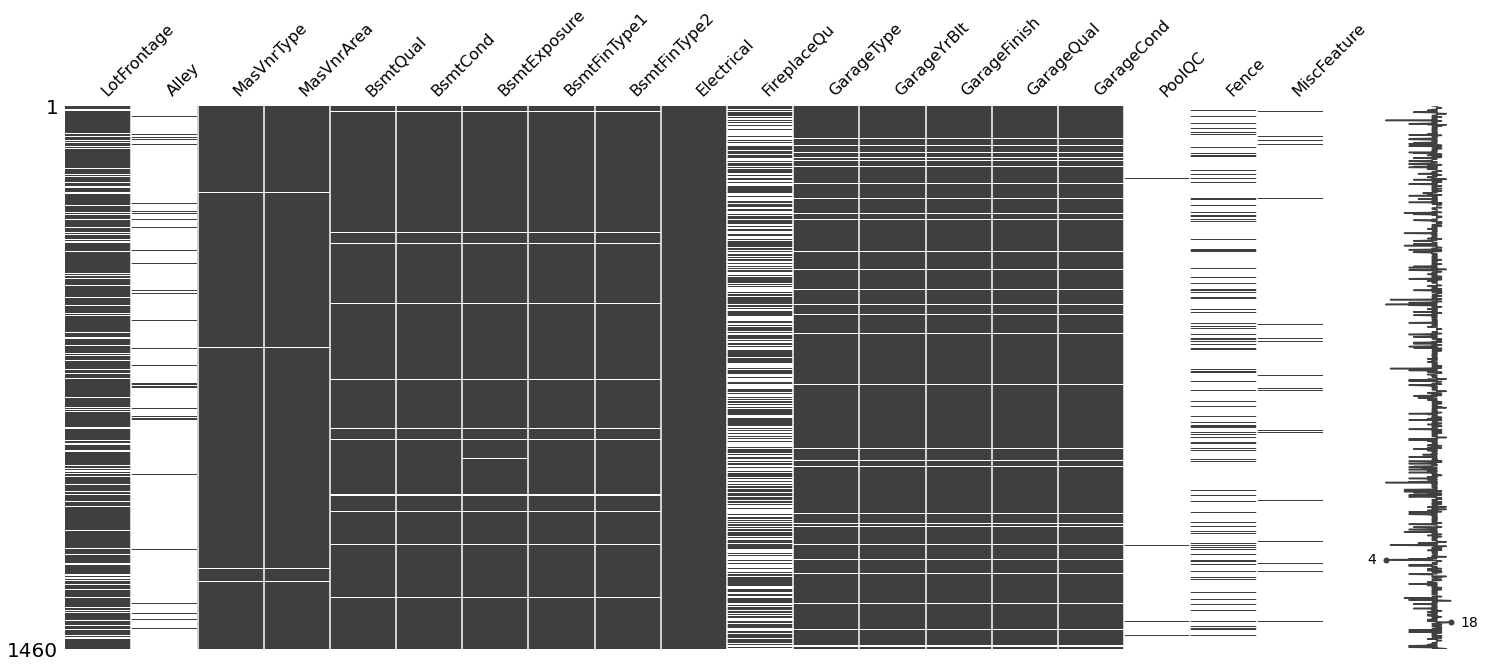

In [8]:
nullable_columns = houses.columns[houses.isnull().any()].tolist()
msno.matrix(houses[nullable_columns])
plt.show()

black lines represent non-nullity while the white lines indicate the presence of a null value in that column

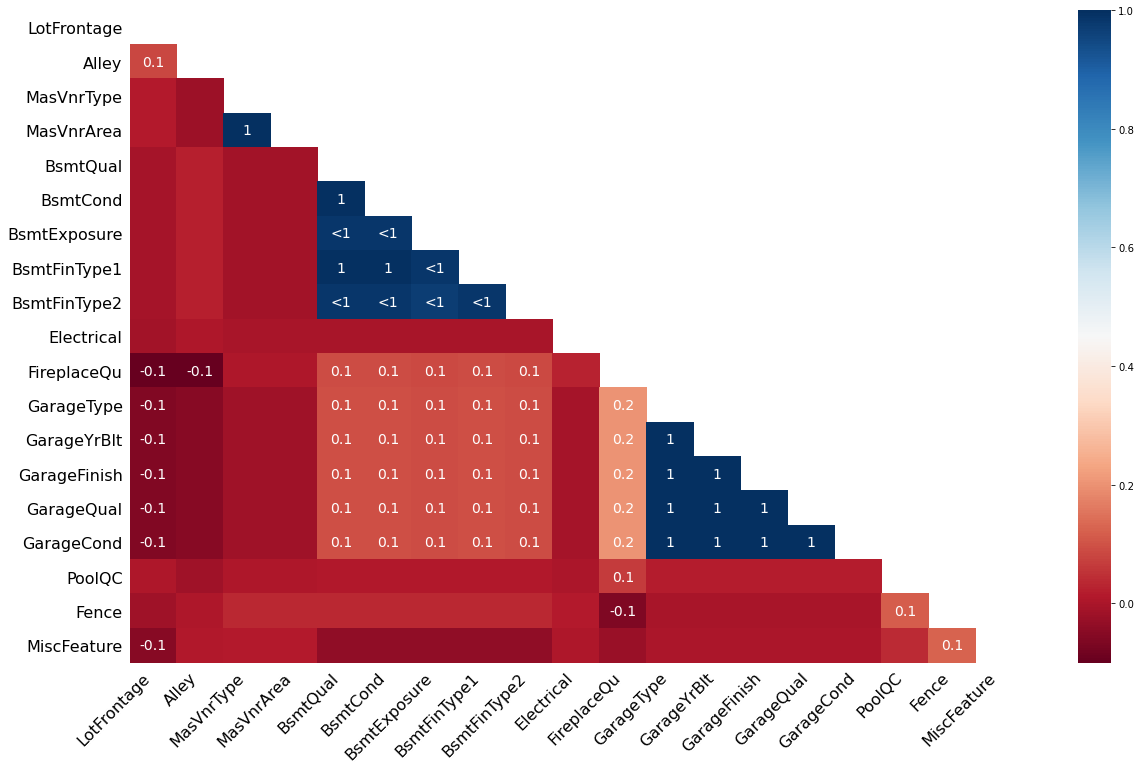

In [9]:
msno.heatmap(houses[nullable_columns], vmin=-0.1)
plt.show()

<b> 5. Delete the columns having more than 80% of their values missing </b>

In [10]:
del_columns = houses.columns[perc > 80].tolist()
del_columns

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [11]:
len(houses.columns)

81

In [12]:
houses.drop(del_columns, axis=1, inplace=True)

In [13]:
len(houses.columns)

77

<b> 6. Replace null values in the FireplaceQu column with NA values </b>

In [14]:
houses['FireplaceQu'].isnull().sum()

690

In [15]:
houses.FireplaceQu = houses.FireplaceQu.fillna('NA')

In [16]:
houses['FireplaceQu'].isnull().sum()

0

<b> Plot a histogram using Matplotlib for the target variable SalePrice </b>

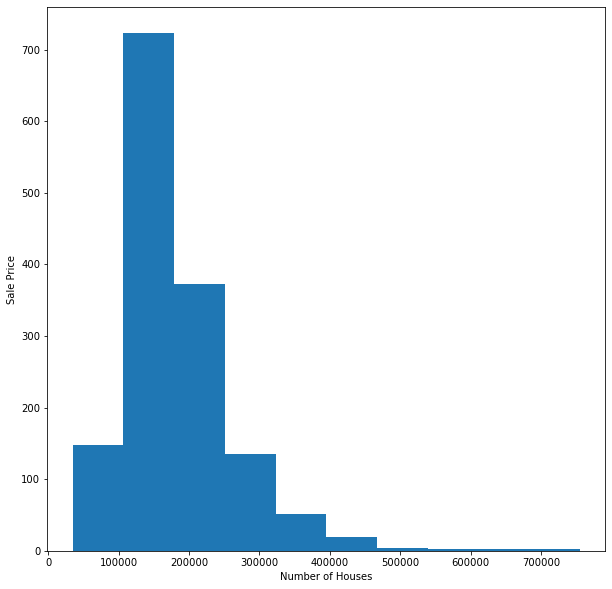

In [17]:
plt.figure(figsize=(10,10))
plt.hist(houses.SalePrice)
plt.xlabel('Number of Houses')
plt.ylabel('Sale Price')
plt.show()

<b> Find the number of unique values within each column having an object type. </b>

In [18]:
# finding object type columns
object_variables = houses.select_dtypes(include=[np.object])

In [19]:
object_variables.nunique().sort_values()

Street            2
Utilities         2
CentralAir        2
LandSlope         3
PavedDrive        3
GarageFinish      3
BsmtCond          4
LotShape          4
LandContour       4
ExterQual         4
BsmtQual          4
MasVnrType        4
BsmtExposure      4
KitchenQual       4
ExterCond         5
MSZoning          5
HeatingQC         5
GarageQual        5
GarageCond        5
LotConfig         5
Electrical        5
BldgType          5
GarageType        6
FireplaceQu       6
Heating           6
Foundation        6
BsmtFinType1      6
RoofStyle         6
BsmtFinType2      6
SaleCondition     6
Functional        7
RoofMatl          8
HouseStyle        8
Condition2        8
SaleType          9
Condition1        9
Exterior1st      15
Exterior2nd      16
Neighborhood     25
dtype: int64

<b> Create a DataFrame representing the number of occurrences for each categorical value in the HouseStyle column </b>

In [20]:
counts = houses.HouseStyle.value_counts()
counts = counts.reset_index()
counts

,index,HouseStyle
0,1Story,726
1,2Story,445
2,1.5Fin,154
3,SLvl,65
4,SFoyer,37
5,1.5Unf,14
6,2.5Unf,11
7,2.5Fin,8


<b> Plot a pie chart representing these counts </b>

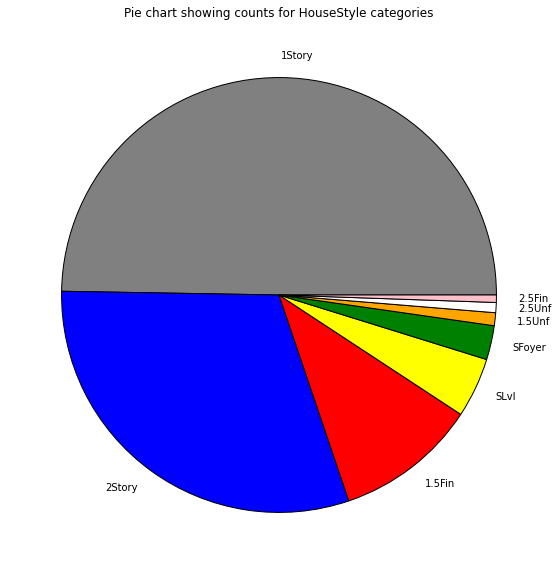

In [21]:
fig, ax = plt.subplots(figsize=(10,10))
slices = ax.pie(counts.HouseStyle, 
               labels=counts['index'],
               colors=['gray', 'blue', 'red', 'yellow', 'green', 'orange', 'white', 'pink'],
               wedgeprops={'edgecolor': 'black'} )
plt.title('Pie chart showing counts for HouseStyle categories')
plt.show()

<b> Find the number of unique values within each column having a number type </b>

In [22]:
numeric_variables = houses.select_dtypes(include=[np.number])
numeric_variables

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [23]:
numeric_variables.nunique().sort_values()

BsmtHalfBath        3
HalfBath            3
FullBath            4
BsmtFullBath        4
Fireplaces          4
KitchenAbvGr        4
GarageCars          5
YrSold              5
BedroomAbvGr        8
PoolArea            8
OverallCond         9
OverallQual        10
TotRmsAbvGrd       12
MoSold             12
MSSubClass         15
3SsnPorch          20
MiscVal            21
LowQualFinSF       24
YearRemodAdd       61
ScreenPorch        76
GarageYrBlt        97
LotFrontage       110
YearBuilt         112
EnclosedPorch     120
BsmtFinSF2        144
OpenPorchSF       202
WoodDeckSF        274
MasVnrArea        327
2ndFlrSF          417
GarageArea        441
BsmtFinSF1        637
SalePrice         663
TotalBsmtSF       721
1stFlrSF          753
BsmtUnfSF         780
GrLivArea         861
LotArea          1073
Id               1460
dtype: int64

<b> Plot a histogram using seaborn for the LotArea variable </b>

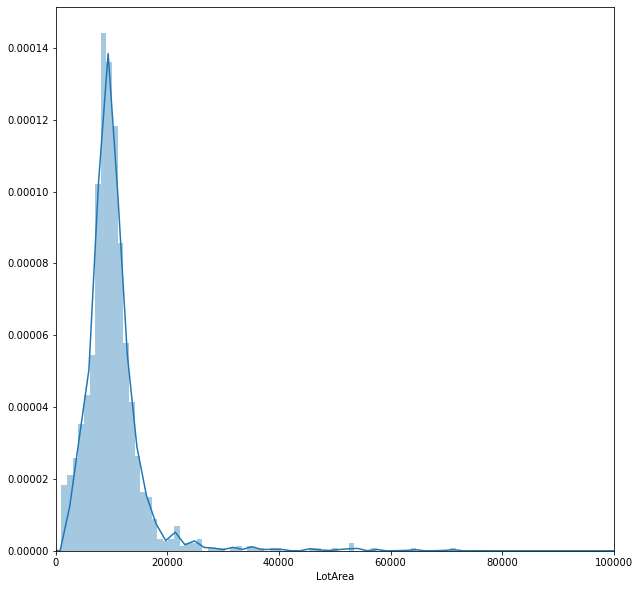

In [24]:
plt.figure(figsize=(10,10))
plt.xlim(0,100000)
sns.distplot(houses.LotArea.dropna(), bins=np.linspace(0,100000,100))
plt.show()

<b> Calculate the skew and kurtosis values for the values in each column </b>

In [25]:
houses.skew().sort_values()

GarageYrBlt      -0.649415
YearBuilt        -0.613461
YearRemodAdd     -0.503562
GarageCars       -0.342549
Id                0.000000
FullBath          0.036562
YrSold            0.096269
GarageArea        0.179981
BedroomAbvGr      0.211790
MoSold            0.212053
OverallQual       0.216944
BsmtFullBath      0.596067
Fireplaces        0.649565
HalfBath          0.675897
TotRmsAbvGrd      0.676341
OverallCond       0.693067
2ndFlrSF          0.813030
BsmtUnfSF         0.920268
GrLivArea         1.366560
1stFlrSF          1.376757
MSSubClass        1.407657
TotalBsmtSF       1.524255
WoodDeckSF        1.541376
BsmtFinSF1        1.685503
SalePrice         1.882876
LotFrontage       2.163569
OpenPorchSF       2.364342
MasVnrArea        2.669084
EnclosedPorch     3.089872
BsmtHalfBath      4.103403
ScreenPorch       4.122214
BsmtFinSF2        4.255261
KitchenAbvGr      4.488397
LowQualFinSF      9.011341
3SsnPorch        10.304342
LotArea          12.207688
PoolArea         14.828374
M

In [26]:
houses.kurt()

Id                -1.200000
MSSubClass         1.580188
LotFrontage       17.452867
LotArea          203.243271
OverallQual        0.096293
OverallCond        1.106413
YearBuilt         -0.439552
YearRemodAdd      -1.272245
MasVnrArea        10.082417
BsmtFinSF1        11.118236
BsmtFinSF2        20.113338
BsmtUnfSF          0.474994
TotalBsmtSF       13.250483
1stFlrSF           5.745841
2ndFlrSF          -0.553464
LowQualFinSF      83.234817
GrLivArea          4.895121
BsmtFullBath      -0.839098
BsmtHalfBath      16.396642
FullBath          -0.857043
HalfBath          -1.076927
BedroomAbvGr       2.230875
KitchenAbvGr      21.532404
TotRmsAbvGrd       0.880762
Fireplaces        -0.217237
GarageYrBlt       -0.418341
GarageCars         0.220998
GarageArea         0.917067
WoodDeckSF         2.992951
OpenPorchSF        8.490336
EnclosedPorch     10.430766
3SsnPorch        123.662379
ScreenPorch       18.439068
PoolArea         223.268499
MiscVal          701.003342
MoSold            -0

<b> Plot the correlation heatmap for the dataset </b>

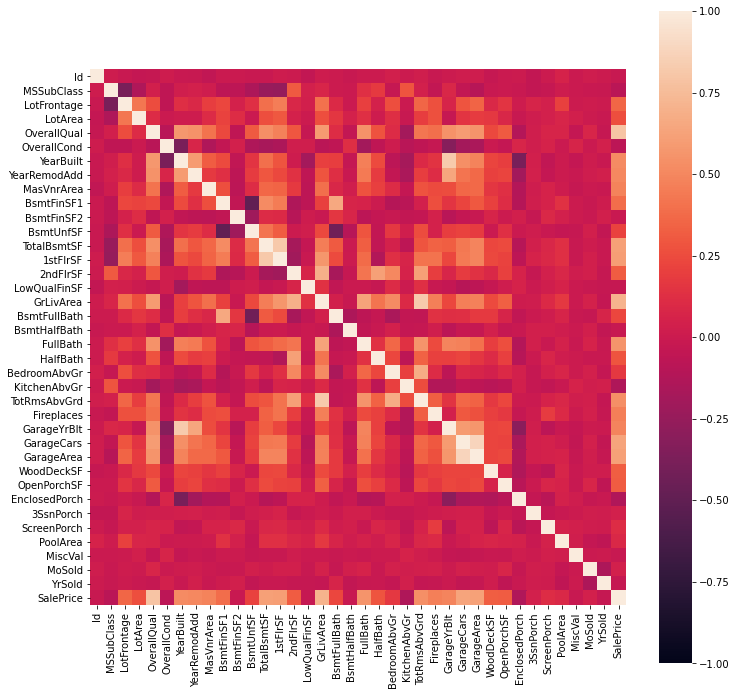

In [27]:
plt.figure(figsize=(12,12))
sns.heatmap(houses.corr(), square=True, Cmap='RdBu', vmin=-1, vmax=1)
plt.show()

<b> Plot a more compact heatmap having annotations for correlation values </b>

In [28]:
feature_subset = [
    'GarageArea', 'GarageCars','GarageCond','GarageFinish','GarageQual','GarageType',
    'GarageYrBlt','GrLivArea','LotArea','MasVnrArea','SalePrice'
]

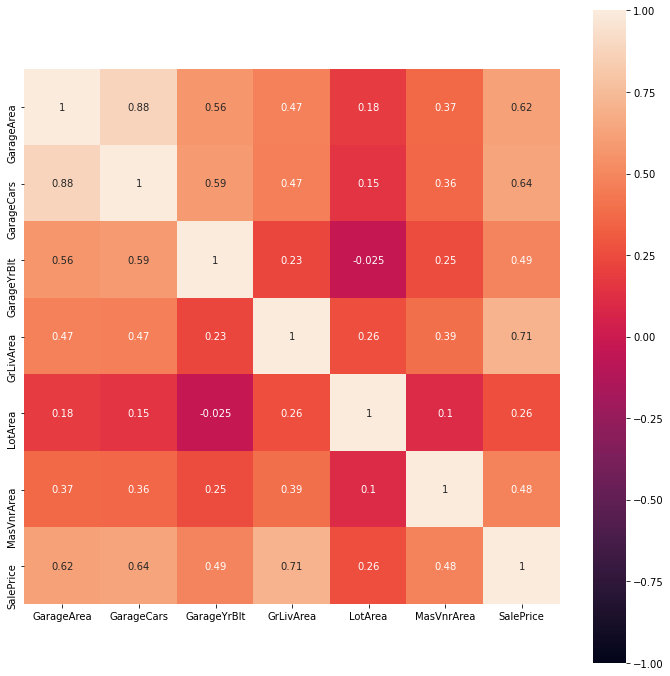

In [29]:
plt.figure(figsize=(12,12))
sns.heatmap(houses[feature_subset].corr(), square=True, annot=True, Cmap='RdBu', vmin=-1, vmax=1)
plt.show()

<b> Display the pairplot for the same subset of features, with the KDE plot on the diagonals and the scatter plot elsewhere </b>

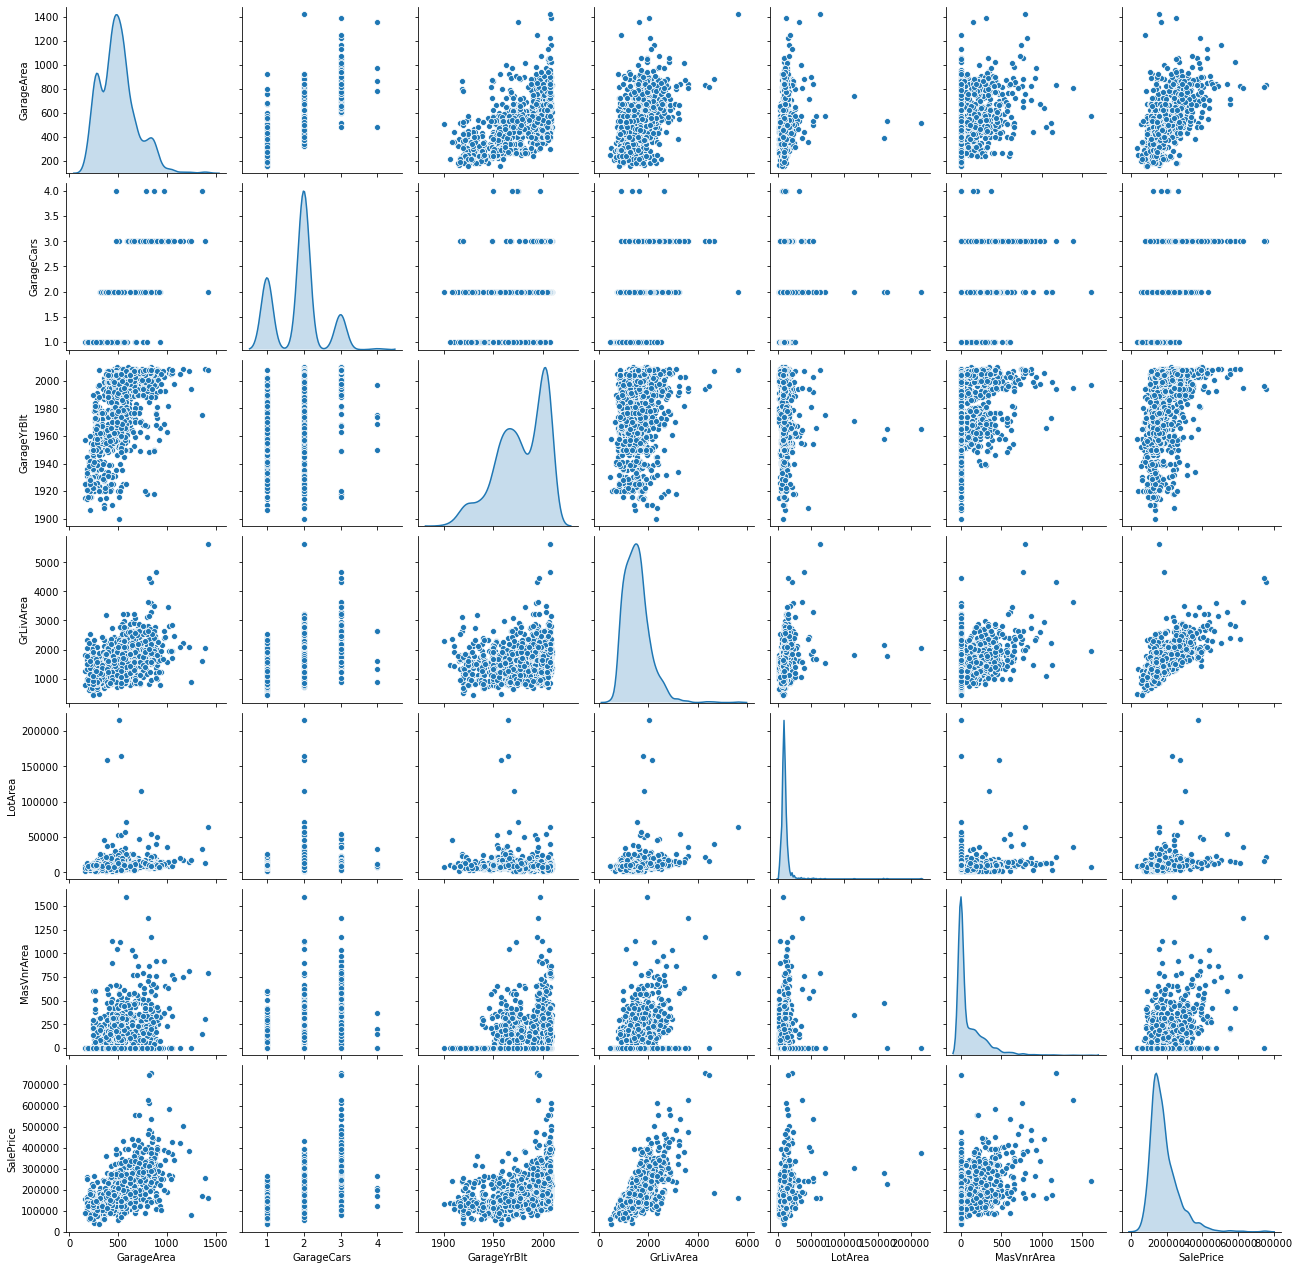

In [30]:
sns.pairplot(houses[feature_subset].dropna(), kind='scatter', diag_kind='kde')
plt.show()

<b> Create a boxplot to show the variation in SalePrice for each category of GarageCars </b>

In [31]:
subset = houses[~pd.isnull(houses.SalePrice)][['SalePrice', 'GarageCars']]

In [32]:
data_to_plot = subset.groupby('GarageCars').sum()
data_to_plot

,SalePrice
GarageCars,
0,8368700
1,47275058
2,151493771
3,56044138
4,963279


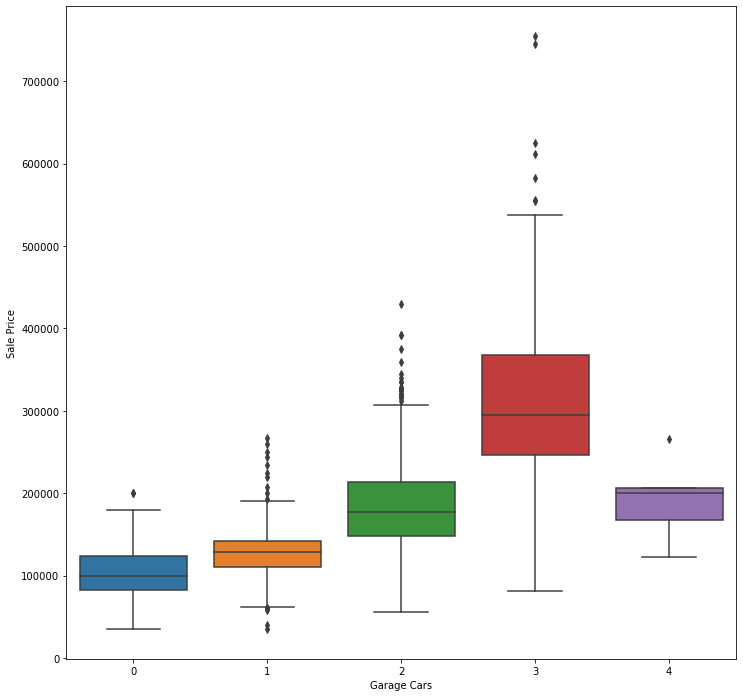

In [33]:
plt.figure(figsize=(12,12))
sns.boxplot(x='GarageCars', y='SalePrice', data=subset)
plt.xlabel('Garage Cars')
plt.ylabel('Sale Price')
plt.show()

<b> Plot a line graph using seaborn to show the variation in SalePrice for older and more recently built homes </b>

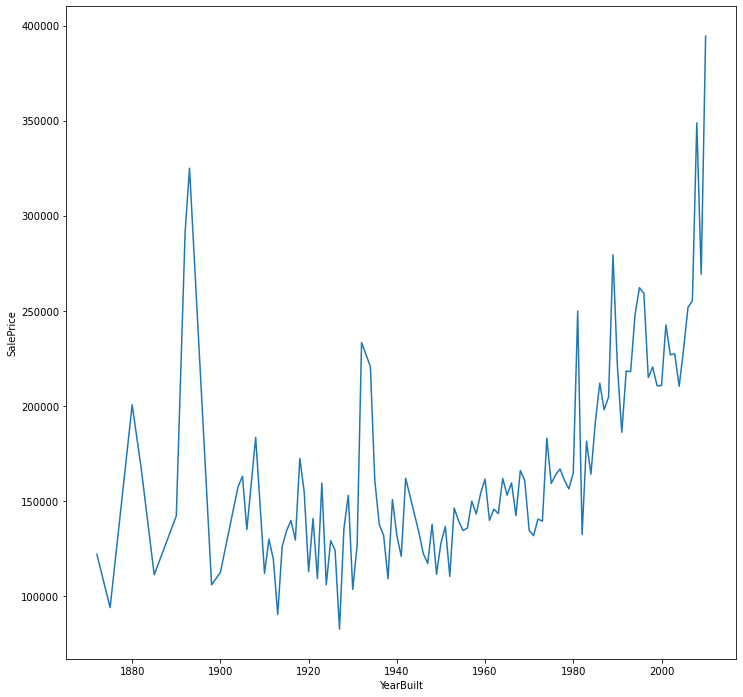

In [34]:
plt.figure(figsize=(12,12))
sns.lineplot(x=houses.YearBuilt, y=houses.SalePrice, ci=None)
plt.show()